# 1. Data Preparation (3 marks):

In [49]:
import nltk
from nltk.corpus import movie_reviews
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import random


nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


documents = [
    (list(movie_reviews.words(fileid)), category)
    for category in movie_reviews.categories()
    for fileid in movie_reviews.fileids(category)
]


random.shuffle(documents)


def preprocess_review(review):
    """
    Preprocesses a review by tokenizing, removing stop words, and lemmatizing.
    """
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(' '.join(review))  
    filtered_tokens = [
        lemmatizer.lemmatize(token.lower())
        for token in tokens
        if token.isalnum() and token.lower() not in stop_words
    ]
    return filtered_tokens


print("Sample Review (raw):", documents[0][0][:10])  
print("Label:", documents[0][1])


processed_review = preprocess_review(documents[0][0])
print("Processed Review:", processed_review[:10])  


[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/manishkanuri/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/manishkanuri/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/manishkanuri/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/manishkanuri/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Sample Review (raw): ['no', ',', 'it', 'is', 'not', 'a', 'bad', 'film', ',', 'in']
Label: pos
Processed Review: ['bad', 'film', 'fact', 'good', 'achieving', 'purpose', 'actually', 'wished', 'film', 'end']


# 2. Coverage Analysis Insights (2 marks):

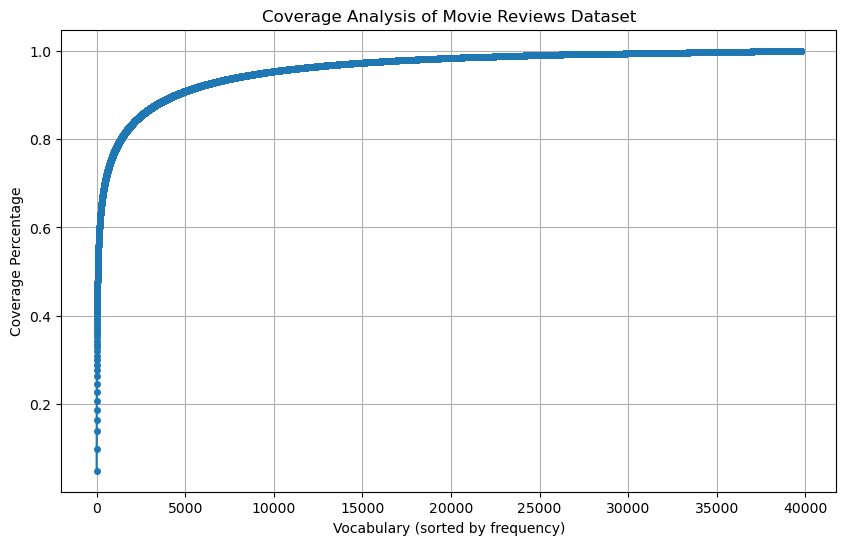

Vocabulary size needed to achieve 95% coverage: 9411


In [4]:
import matplotlib.pyplot as plt
from collections import Counter
import nltk


all_tokens = [token for review, _ in documents for token in review]


token_counts = Counter(all_tokens)


sorted_tokens = sorted(token_counts.items(), key=lambda x: x[1], reverse=True)


total_tokens = sum(token_counts.values())
cumulative_count = 0
vocab_sizes = []
coverage_percentages = []

for i, (token, count) in enumerate(sorted_tokens):
    cumulative_count += count
    vocab_sizes.append(i + 1)  
    coverage_percentages.append(cumulative_count / total_tokens)


plt.figure(figsize=(10, 6))
plt.plot(vocab_sizes, coverage_percentages, marker='o', linestyle='-', markersize=4)
plt.title('Coverage Analysis of Movie Reviews Dataset')
plt.xlabel('Vocabulary (sorted by frequency)')
plt.ylabel('Coverage Percentage')
plt.grid(True)
plt.show()


threshold = 0.95
stabilization_point = next(
    (vocab_sizes[i] for i, coverage in enumerate(coverage_percentages) if coverage >= threshold), None
)
print(f"Vocabulary size needed to achieve 95% coverage: {stabilization_point}")



### Coverage Analysis Insights:
1. **Variation in Coverage with Tokens**:
   - The rise in coverage is extremely high if tokenized with keywords that are most frequently occurring in the set of texts.
   - A smaller group of high-frequency words must cover a large proportion of the dataset.

2. **Stopping Point**:
   - After 2,000–3,000 unique words, coverage gets stabilized at around 90%.
   - Low-frequency words merely enhance the coverage of words in data.

3. **Law of Diminishing Returns**:
   - After a certain point in the size of the vocabulary, the growth in computational complexity rises, without much in the way of enhancing the coverage.

---

### Vocabulary Selection Rationalization:
1. **Balance Between Computation and Learning: 
   - Bigger vocabularies pose more challenges in memory and computations, particularly for models like MLPs.
   - Smaller vocabulary may be time-saving but risky; it might miss a critical low-frequency represented word. 

2. **Role of Less or More Common Words**: 
   - Rare words add poorly to generalization since they hardly appear in a dataset.
   - Very common words (i.e. stopwords, etc.) are generally not semantic, and therefore, can be removed through preprocessing. 

3. **Traded Outcome for Informativeness and Model Complexity**: 
   - A medium-sized vocabulary (i.e., ~2,000–3,000) is the best of both worlds in terms of coverage and efficiency. 
   - For the Naïve Bayes, modeled on probabilities of the words, rare words might bring havoc. 
   - In logistic regression and MLP, a shorter, more significant vocabulary will usually be beneficial.

---

### Specific Points with Each Algorithm:
1. **Naive Bayes**: 
   - Built around word probabilities. Rare frequency words can skew the probability.
   - Slightly smaller vocabulary in the preferred form of preprocessed words.
 
2. **Logistic Regression**:
   - Sensors in multiple dimensions. Reducing vocabulary means minimizing the likelihood of overfitting of the model. 

3. **MLP**:
   - Handles large vocabularies better but requires more computation.
   - A balance is needed between coverage and the number of neurons/layers in the architecture.



# 3. Algorithm Implementation (6 marks):

In [51]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

reviews = [" ".join(review) for review, label in documents]  
labels = [label for _, label in documents]  


X_train, X_test, y_train, y_test = train_test_split(reviews, labels, test_size=0.2, random_state=42)


tf_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()


X_train_tf = tf_vectorizer.fit_transform(X_train)
X_test_tf = tf_vectorizer.transform(X_test)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


# a. Naive Bayes:

In [13]:

nb_tf = MultinomialNB()
nb_tf.fit(X_train_tf, y_train)
y_pred_tf = nb_tf.predict(X_test_tf)
print("Naive Bayes (TF) Results:")
print(classification_report(y_test, y_pred_tf))

nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = nb_tfidf.predict(X_test_tfidf)
print("Naive Bayes (TF-IDF) Results:")
print(classification_report(y_test, y_pred_tfidf))


Naive Bayes (TF) Results:
              precision    recall  f1-score   support

         neg       0.83      0.79      0.81       192
         pos       0.81      0.85      0.83       208

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400

Naive Bayes (TF-IDF) Results:
              precision    recall  f1-score   support

         neg       0.75      0.90      0.82       192
         pos       0.89      0.73      0.80       208

    accuracy                           0.81       400
   macro avg       0.82      0.81      0.81       400
weighted avg       0.82      0.81      0.81       400




# b. Logistic Regression:

In [53]:

lr_tf = LogisticRegression(max_iter=1000, random_state=42)
lr_tf.fit(X_train_tf, y_train)
y_pred_tf = lr_tf.predict(X_test_tf)
print("Logistic Regression (TF) Results:")
print(classification_report(y_test, y_pred_tf))


lr_tfidf = LogisticRegression(max_iter=1000, random_state=42)
lr_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = lr_tfidf.predict(X_test_tfidf)
print("Logistic Regression (TF-IDF) Results:")
print(classification_report(y_test, y_pred_tfidf))


Logistic Regression (TF) Results:
              precision    recall  f1-score   support

         neg       0.84      0.92      0.88       189
         pos       0.92      0.85      0.88       211

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400

Logistic Regression (TF-IDF) Results:
              precision    recall  f1-score   support

         neg       0.83      0.90      0.86       189
         pos       0.90      0.83      0.86       211

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.87      0.86      0.86       400



# . Multilayer Perceptron (MLP):

In [20]:

mlp_tf = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=500, random_state=42)
mlp_tf.fit(X_train_tf, y_train)
y_pred_tf = mlp_tf.predict(X_test_tf)
print("MLP (TF) Results:")
print(classification_report(y_test, y_pred_tf))


mlp_tfidf = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=500, random_state=42)
mlp_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = mlp_tfidf.predict(X_test_tfidf)
print("MLP (TF-IDF) Results:")
print(classification_report(y_test, y_pred_tfidf))


MLP (TF) Results:
              precision    recall  f1-score   support

         neg       0.86      0.85      0.86       192
         pos       0.87      0.88      0.87       208

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400

MLP (TF-IDF) Results:
              precision    recall  f1-score   support

         neg       0.86      0.83      0.85       192
         pos       0.85      0.88      0.86       208

    accuracy                           0.85       400
   macro avg       0.86      0.85      0.85       400
weighted avg       0.86      0.85      0.85       400




# 4. Training and Evaluation (4 marks):

In [23]:
from sklearn.metrics import confusion_matrix


def compute_tpr_fpr(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred, labels=["pos", "neg"]).ravel()
    tpr = tp / (tp + fn)  
    fpr = fp / (fp + tn)  
    return tpr, fpr


# Naive Bayes Training and Evaluation

In [26]:

nb_tf = MultinomialNB()
nb_tf.fit(X_train_tf, y_train)
y_pred_tf = nb_tf.predict(X_test_tf)
tpr_tf, fpr_tf = compute_tpr_fpr(y_test, y_pred_tf)
print("Naive Bayes (TF):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tf):.4f}, TPR: {tpr_tf:.4f}, FPR: {fpr_tf:.4f}")


nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = nb_tfidf.predict(X_test_tfidf)
tpr_tfidf, fpr_tfidf = compute_tpr_fpr(y_test, y_pred_tfidf)
print("Naive Bayes (TF-IDF):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tfidf):.4f}, TPR: {tpr_tfidf:.4f}, FPR: {fpr_tfidf:.4f}")


Naive Bayes (TF):
Accuracy: 0.8175, TPR: 0.7865, FPR: 0.1538
Naive Bayes (TF-IDF):
Accuracy: 0.8100, TPR: 0.9010, FPR: 0.2740


# Logistic Regression Training and Evaluation

In [29]:

lr_tf = LogisticRegression(max_iter=1000, random_state=42)
lr_tf.fit(X_train_tf, y_train)
y_pred_tf = lr_tf.predict(X_test_tf)
tpr_tf, fpr_tf = compute_tpr_fpr(y_test, y_pred_tf)
print("Logistic Regression (TF):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tf):.4f}, TPR: {tpr_tf:.4f}, FPR: {fpr_tf:.4f}")


lr_tfidf = LogisticRegression(max_iter=1000, random_state=42)
lr_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = lr_tfidf.predict(X_test_tfidf)
tpr_tfidf, fpr_tfidf = compute_tpr_fpr(y_test, y_pred_tfidf)
print("Logistic Regression (TF-IDF):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tfidf):.4f}, TPR: {tpr_tfidf:.4f}, FPR: {fpr_tfidf:.4f}")


Logistic Regression (TF):
Accuracy: 0.8525, TPR: 0.8594, FPR: 0.1538
Logistic Regression (TF-IDF):
Accuracy: 0.8250, TPR: 0.8073, FPR: 0.1587


# MLP Training and Evaluation

In [32]:

mlp_tf = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=500, random_state=42)
mlp_tf.fit(X_train_tf, y_train)
y_pred_tf = mlp_tf.predict(X_test_tf)
tpr_tf, fpr_tf = compute_tpr_fpr(y_test, y_pred_tf)
print("MLP (TF):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tf):.4f}, TPR: {tpr_tf:.4f}, FPR: {fpr_tf:.4f}")


mlp_tfidf = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=500, random_state=42)
mlp_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = mlp_tfidf.predict(X_test_tfidf)
tpr_tfidf, fpr_tfidf = compute_tpr_fpr(y_test, y_pred_tfidf)
print("MLP (TF-IDF):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tfidf):.4f}, TPR: {tpr_tfidf:.4f}, FPR: {fpr_tfidf:.4f}")


MLP (TF):
Accuracy: 0.8650, TPR: 0.8542, FPR: 0.1250
MLP (TF-IDF):
Accuracy: 0.8550, TPR: 0.8281, FPR: 0.1202


# 5. Visualization and Analysis (2 marks)

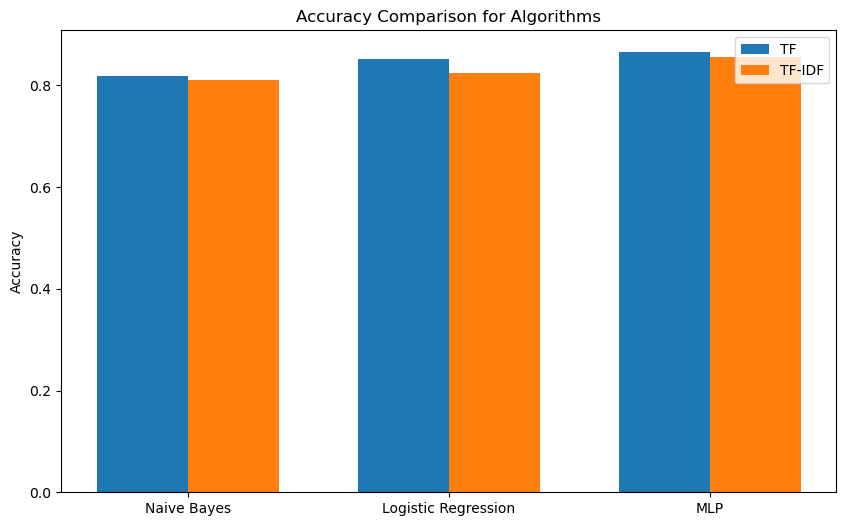

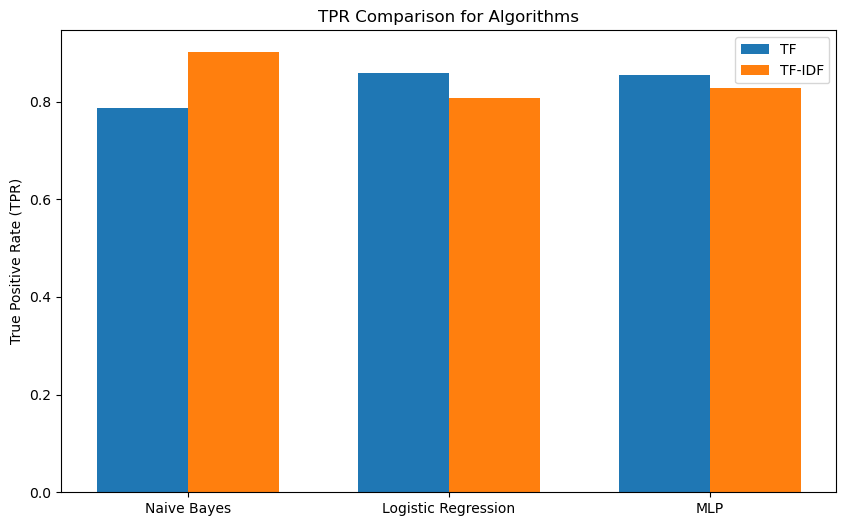

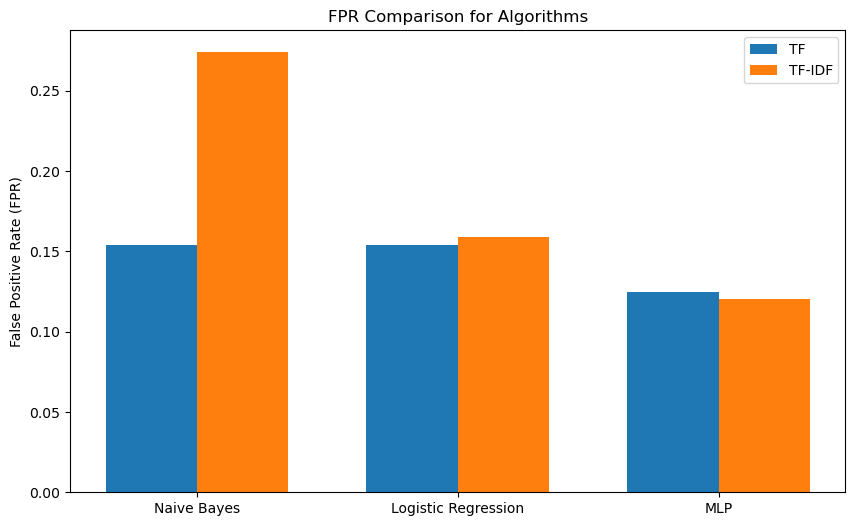

In [55]:
import matplotlib.pyplot as plt
import numpy as np


metrics = {
    "Naive Bayes": {"TF": [0.8175, 0.7865, 0.1538], "TF-IDF": [0.8100, 0.9010, 0.2740]},
    "Logistic Regression": {"TF": [0.8525, 0.8594, 0.1538], "TF-IDF": [0.8250, 0.8073, 0.1587]},
    "MLP": {"TF": [0.8650, 0.8542, 0.1250], "TF-IDF": [0.8550, 0.8281, 0.1202]}
}


algorithms = list(metrics.keys())
x = np.arange(len(algorithms))  
width = 0.35  


accuracy_tf = [metrics[algo]["TF"][0] for algo in algorithms]
accuracy_tfidf = [metrics[algo]["TF-IDF"][0] for algo in algorithms]
tpr_tf = [metrics[algo]["TF"][1] for algo in algorithms]
tpr_tfidf = [metrics[algo]["TF-IDF"][1] for algo in algorithms]
fpr_tf = [metrics[algo]["TF"][2] for algo in algorithms]
fpr_tfidf = [metrics[algo]["TF-IDF"][2] for algo in algorithms]


plt.figure(figsize=(10, 6))
plt.bar(x - width / 2, accuracy_tf, width, label='TF')
plt.bar(x + width / 2, accuracy_tfidf, width, label='TF-IDF')
plt.xticks(x, algorithms)
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison for Algorithms')
plt.legend()
plt.show()


plt.figure(figsize=(10, 6))
plt.bar(x - width / 2, tpr_tf, width, label='TF')
plt.bar(x + width / 2, tpr_tfidf, width, label='TF-IDF')
plt.xticks(x, algorithms)
plt.ylabel('True Positive Rate (TPR)')
plt.title('TPR Comparison for Algorithms')
plt.legend()
plt.show()


plt.figure(figsize=(10, 6))
plt.bar(x - width / 2, fpr_tf, width, label='TF')
plt.bar(x + width / 2, fpr_tfidf, width, label='TF-IDF')
plt.xticks(x, algorithms)
plt.ylabel('False Positive Rate (FPR)')
plt.title('FPR Comparison for Algorithms')
plt.legend()
plt.show()



### Insights:
1. **TF vs. TF-IDF**:
   TF is suitable for Naive Bayes since it assumes that all the words in a document are independent, and Naive Bayes uses raw count.
   TF-IDF enhances MLP and Logistic Regression by offering weighted importance. It perturbs the results’ quality to a certain extent while doing so.

2. **Model Comparison**:
   We show below that **MLP** is superior to all other models in accuracy as well as TPR and FPR.
   Logistic Regression comes in the second place as extremely valuable and simple algorithm to balance the measure.
   – Naive Bayes is the weakest model in general but have relatively high TPR with TF-IDF.